#Import all libraries 

In [63]:
import numpy as np
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans 
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
from sklearn.metrics import silhouette_score
from sklearn.cluster import SpectralClustering
from sklearn import metrics

#Load data 

In [45]:
#1. Load your dataset. 
data=pd.read_csv("CC GENERAL.csv")
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


#Preprocessing

In [46]:
data.drop(["CUST_ID"],axis=1,inplace=True)
data.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [47]:
data['MINIMUM_PAYMENTS'] = data['MINIMUM_PAYMENTS'].fillna(data['MINIMUM_PAYMENTS'].mean()) 
data['CREDIT_LIMIT'] = data['CREDIT_LIMIT'].fillna(data['CREDIT_LIMIT'].mean()) 
data.isnull().sum().sum()

0

##Scaling data

In [48]:

# Scaling the data so that all the features become comparable
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)
  
# Normalizing the data so that the data approximately 
# follows a Gaussian distribution
X_normalized = normalize(X_scaled)
  
# Converting the numpy array into a pandas DataFrame
X_normalized = pd.DataFrame(X_normalized)

In [49]:
X_normalized.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-0.311938,-0.106297,-0.181072,-0.152108,-0.148760,-0.198921,-0.343687,-0.289212,-0.301422,-0.287801,-0.202878,-0.217905,-0.409290,-0.225425,-1.325192e-01,-0.223964,0.153704
1,0.219925,0.037539,-0.131222,-0.099749,-0.127037,0.728166,-0.341434,-0.189660,-0.256265,0.160401,0.030761,-0.165384,0.192448,0.228779,2.495877e-02,0.065457,0.100796
2,0.126682,0.146783,-0.030504,0.030850,-0.128790,-0.132249,0.359771,0.757440,-0.259802,-0.191339,-0.134880,-0.030888,0.234039,-0.108739,-2.880315e-02,-0.148899,0.102187
3,0.020589,-0.426439,0.097309,0.229034,-0.190618,-0.154587,-0.425253,-0.167447,-0.384524,-0.108570,-0.138184,-0.231288,0.346393,-0.251048,-2.250182e-16,-0.220379,0.151244
4,-0.151595,0.218909,-0.195238,-0.146744,-0.192075,-0.197234,-0.428504,-0.168727,-0.387463,-0.285359,-0.201157,-0.233056,-0.382591,-0.153959,-1.123064e-01,-0.222064,0.152400


##Dimension reduce 

In [50]:
pca = PCA(n_components = 2)
X_principal = pca.fit_transform(X_normalized)
X_principal = pd.DataFrame(X_principal)


#Agglomerative clustering 

In [51]:
#2. Use hierarchical clustering to identify the inherent groupings within your data.
model=AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='complete')
clust_labels=model.fit_predict(X_principal)
clust_labels

array([1, 2, 0, ..., 3, 1, 0])

##Plot clusters

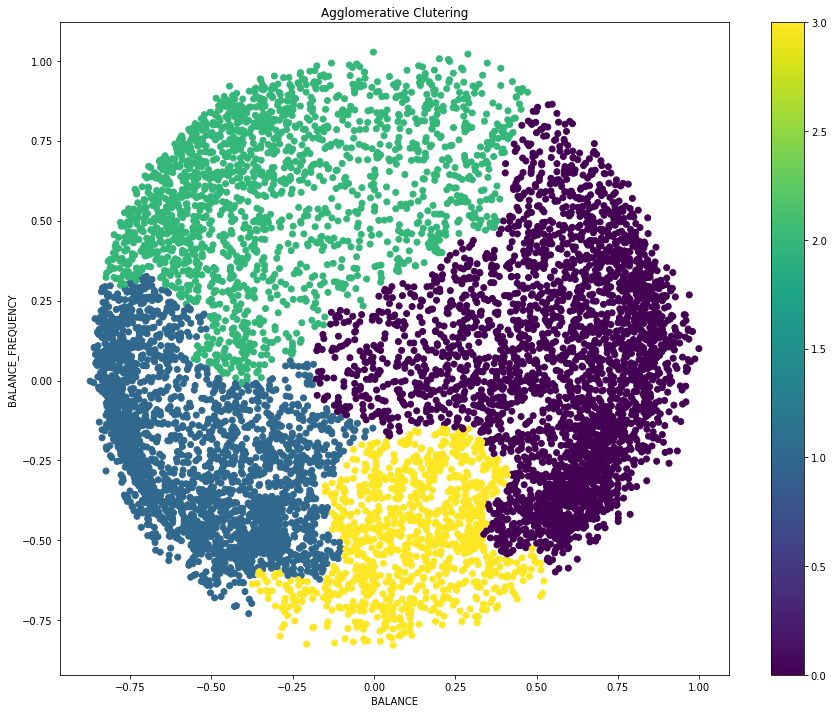

In [52]:
fig =plt.figure(figsize=(15,12))
ax = fig.add_subplot(111)
scatter = ax.scatter (X_principal[0] , X_principal[1] , c=model.fit_predict(X_principal))
ax.set_title("Agglomerative Clutering")
ax.set_xlabel("BALANCE")
ax.set_ylabel("BALANCE_FREQUENCY")
plt.colorbar(scatter)

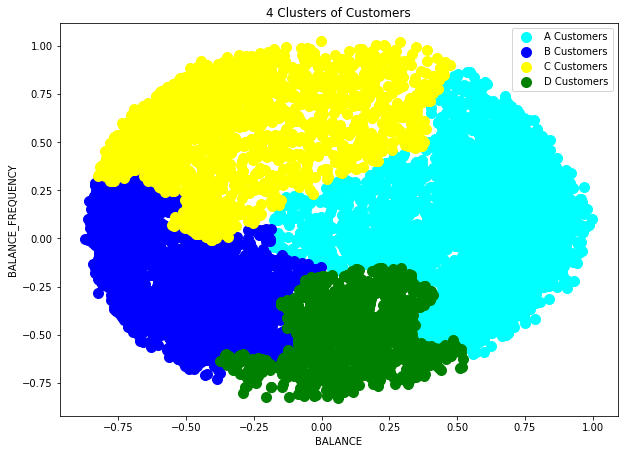

In [53]:
X = X_principal.iloc[:, [0,1]].values

plt.figure(figsize=(10, 7))
plt.subplots_adjust(bottom=0.1)

plt.scatter(X[clust_labels == 0, 0], X[clust_labels == 0, 1], s = 100, c = 'cyan', label = 'A Customers')
plt.scatter(X[clust_labels == 1, 0], X[clust_labels==1, 1], s = 100, c = 'blue', label = 'B Customers')
plt.scatter(X[clust_labels== 2, 0], X[clust_labels == 2, 1], s = 100, c = 'yellow', label = 'C Customers')
plt.scatter(X[clust_labels == 3, 0], X[clust_labels==3, 1], s = 100, c = 'green', label = 'D Customers')

plt.title('4 Clusters of Customers')
plt.xlabel('BALANCE')
plt.ylabel('BALANCE_FREQUENCY')
plt.legend()

plt.show()

##Dendrogram

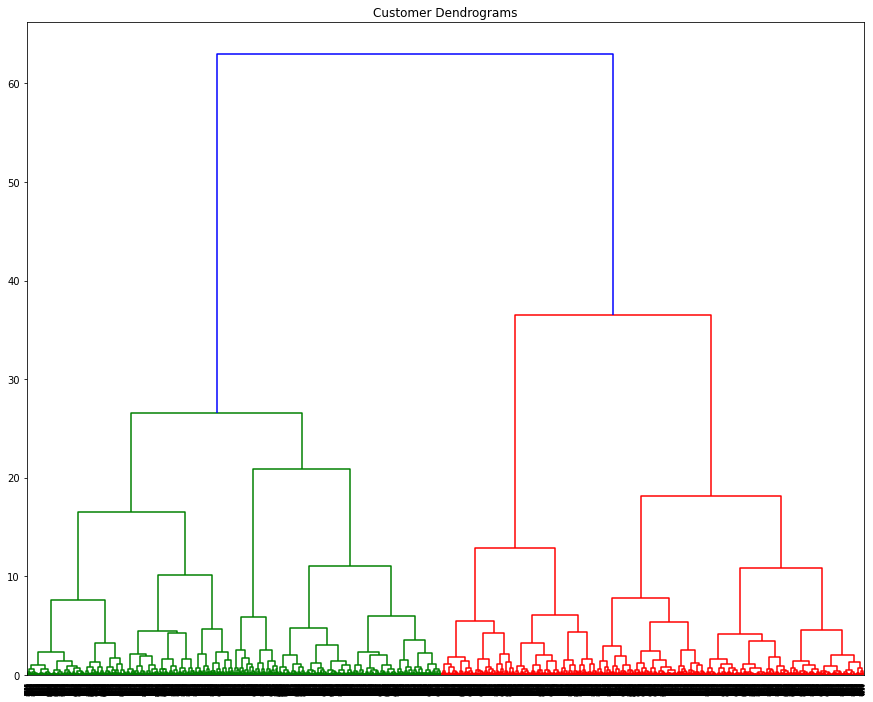

In [54]:
plt.figure(figsize=(15,12))
plt.title("Customer Dendrograms")
dend=shc.dendrogram(shc.linkage(X_principal, method="ward"))

#K_Means

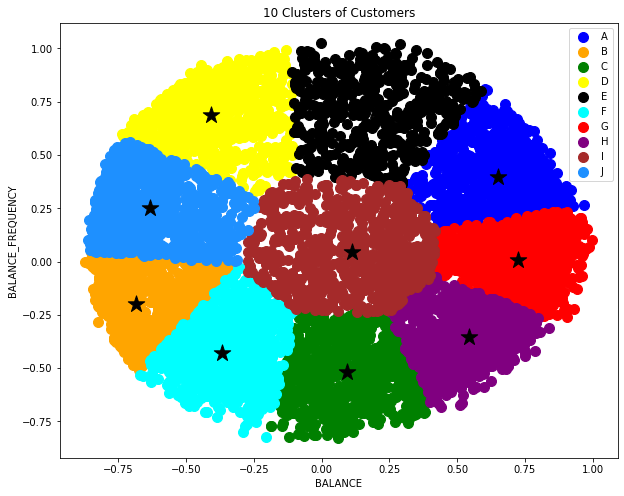

In [55]:
kmeans=KMeans(n_clusters=10)  #Cluster our data by choosing 10 as number of clusters
kmeans.fit(X_principal)
y_pred=kmeans.predict(X_principal)

plt.figure(figsize=(10, 8))

plt.scatter(X[y_pred == 0, 0], X[y_pred == 0, 1], s = 100, c = 'blue', label = 'A')
plt.scatter(X[y_pred == 1, 0], X[y_pred == 1, 1], s = 100, c = 'orange', label = 'B')
plt.scatter(X[y_pred == 2, 0], X[y_pred == 2, 1], s = 100, c = 'green', label = 'C')
plt.scatter(X[y_pred == 3, 0], X[y_pred == 3, 1], s = 100, c = 'yellow', label = 'D')
plt.scatter(X[y_pred == 4, 0], X[y_pred == 4, 1], s = 100, c = 'black', label = 'E')
plt.scatter(X[y_pred == 5, 0], X[y_pred == 5, 1], s = 100, c = 'cyan', label = 'F')
plt.scatter(X[y_pred == 6, 0], X[y_pred == 6, 1], s = 100, c = 'red', label = 'G')
plt.scatter(X[y_pred == 7, 0], X[y_pred == 7, 1], s = 100, c = 'purple', label = 'H')
plt.scatter(X[y_pred == 8, 0], X[y_pred == 8, 1], s = 100, c = 'brown', label = 'I')
plt.scatter(X[y_pred == 9, 0], X[y_pred == 9, 1], s = 100, c = 'dodgerblue', label = 'J')

plt.title('10 Clusters of Customers')
plt.xlabel('BALANCE')
plt.ylabel('BALANCE_FREQUENCY')
plt.legend()

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker ='*', s=300, c='black', label = 'Centroids')

#Elbow method

In [56]:
sum_of_squared_distances=[]
K=range(1,15)
for k in K:
  km=KMeans(n_clusters=k)
  km=km.fit(X_principal)
  sum_of_squared_distances.append(km.inertia_)

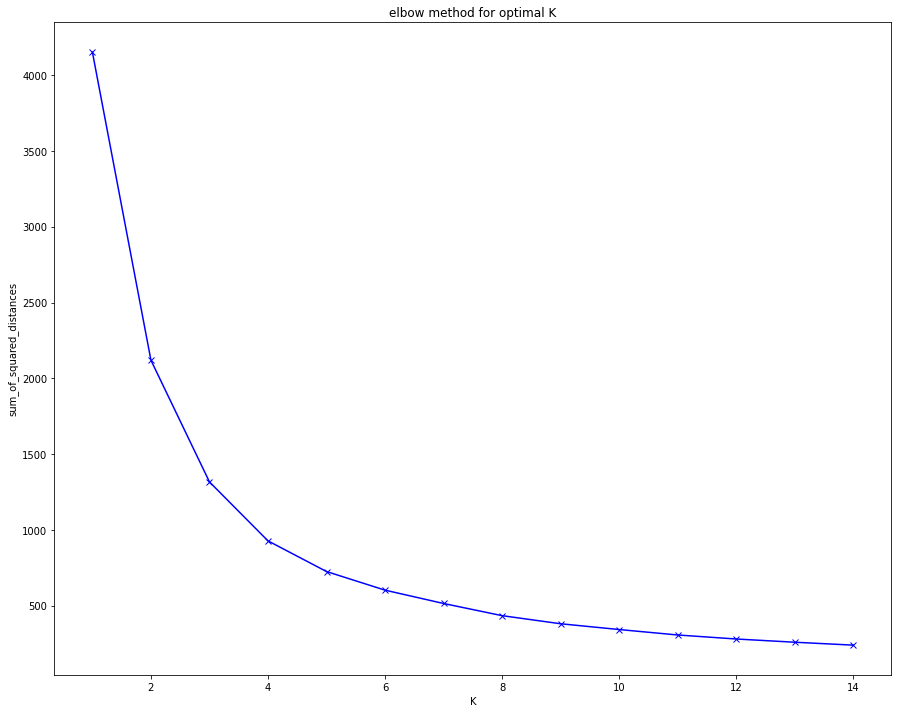

In [57]:
plt.figure(figsize=(15,12))
plt.plot(K,sum_of_squared_distances,'bx-')
plt.xlabel('K')
plt.ylabel('sum_of_squared_distances')
plt.title('elbow method for optimal K')
plt.show()

#Plot clusters using Elbow 

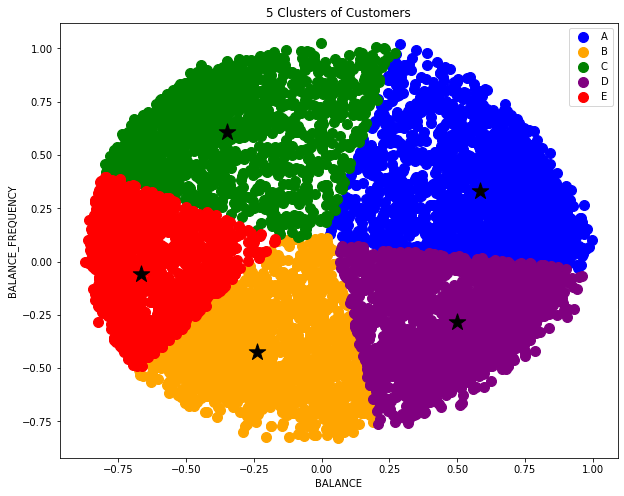

In [58]:
kmeans=KMeans(n_clusters=5)  #Cluster our data by choosing 5 as number of clusters
kmeans.fit(X_principal)
y_pred=kmeans.predict(X_principal)

plt.figure(figsize=(10, 8))

plt.scatter(X[y_pred == 0, 0], X[y_pred == 0, 1], s = 100, c = 'blue', label = 'A')
plt.scatter(X[y_pred == 1, 0], X[y_pred == 1, 1], s = 100, c = 'orange', label = 'B')
plt.scatter(X[y_pred == 2, 0], X[y_pred == 2, 1], s = 100, c = 'green', label = 'C')
plt.scatter(X[y_pred == 3, 0], X[y_pred == 3, 1], s = 100, c = 'purple', label = 'D')
plt.scatter(X[y_pred == 4, 0], X[y_pred == 4, 1], s = 100, c = 'red', label = 'E')


plt.title('5 Clusters of Customers')
plt.xlabel('BALANCE')
plt.ylabel('BALANCE_FREQUENCY')
plt.legend()

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker ='*', s=300, c='black', label = 'Centroids')

the use of the elbow method gives us an optimal k, here according to the decreasing function of the error, I chose k=5 .the algorithm of k_means clustering gives a rate of error clearly lower than with a k=5 (see inertia)

#Another validation metric

I'll choose the Spectral Clustering & I'll test this metric & compare with Hierarchical & Kmeans Clustering

In [60]:
spectral = SpectralClustering(n_clusters=3, affinity="nearest_neighbors", assign_labels='discretize',random_state=40)
y_spectral = spectral.fit_predict(X_principal)

In [61]:
hierarchical_ = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward').fit_predict(X_principal)
kmeans_ = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42).fit_predict(X_principal)
spectral_ = SpectralClustering(n_clusters=3, affinity="nearest_neighbors", assign_labels='discretize',
                                      random_state=40).fit_predict(X_principal)

In [64]:
kmeansSilhouette_Score = metrics.silhouette_score(X, kmeans_, metric='euclidean')
Hierarchical_Silhouette_Score = metrics.silhouette_score(X, hierarchical_, metric='euclidean')
Spectral_Silhouette_Score = metrics.silhouette_score(X, spectral_, metric='euclidean')

In [65]:
Clustering_Silhouette_Scores = [['KMeans',kmeansSilhouette_Score],['Hierarchical',Hierarchical_Silhouette_Score], ['Spectral', Spectral_Silhouette_Score]]
Clustering_Silhouette_Scores = pd.DataFrame(Clustering_Silhouette_Scores, columns=['Clustering Method', 'Silhouette Score']) 
Clustering_Silhouette_Scores.sort_values(by='Silhouette Score', ascending= False)

,Clustering Method,Silhouette Score
0,KMeans,0.458009
2,Spectral,0.443844
1,Hierarchical,0.416723


Kmean clustering still the best model for our exemple